<img src="https://pages.cnpem.br/workshopbioimagens/wp-content/uploads/sites/166/2023/06/logo-ilum-2048x382.png" alt="Descrição da imagem" style="width: 1000px; height: auto; ">

<div style=" padding: 10px; font-size: 34px; text-align: center;">
<strong>Batalha EletroDunder: O retorno</strong> 


<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Autor:</strong> Ana Luz Pereira Mendes 
<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Professor:</strong> Daniel R. Cassar

# Monstrinho 3.4 
Objetivo: Se informe sobre métodos dunder que não foram utilizados no material de
aula e crie uma classe que contenha pelo menos 3 destes métodos dunder. Faça códigos
onde cada um destes métodos dunder seja acessado sem os chamar explicitamente (exemplo: não é para rodar a.__add__(b) mas sim a + b para o caso do dunder __add__).

Considerações do experimento: A classe deve conter pelo menos 3 métodos dunder
que não foram vistos no material da disciplina. Sua classe deve fazer sentido, isto é, não
crie uma classe “sem pé nem cabeça” apenas para a entrega. Reflita sobre uma classe
onde os métodos dunder propostos realmente fazem sentido. Na sua entrega, explique
brevemente o que fazem os métodos dunder que escolheu e mostre eles em ação com uma
instância da sua classe.

--------------

# Prelimináres

Para enfrentar esse mosntro, foi optado utilizar o as classes já criados no Monstrinho 3.3. Assim, a baixo estão as classes que iremos utilizar: 

In [1]:
class Componente_Elétrico:

    def __init__(self,i=None,U=None,R=None):

        if [i,U,R].count(None)<= 1: # U = R*i
            if i == None:
                i = U/R
            elif R == None:
                R = U/i
            elif U == None:
                U = R * i
        
        else:
            print("Para criar um componente elétrico é necessário determinar pelomenos dois dos três argumentos (corrente,diferença de potencial,resistência)")

        self.corrente = i
        self.ddp = U 
        self.resistencia = R
    
    def Carga_transportada(self,t):

        Q = self.corrente*t

        return Q
    

class Capacitor(Componente_Elétrico):

    def __init__(self, i=None, U=None, R=None):
        super().__init__(i, U, R)

        self.capacitância = C
    
    def __repr__(self):
        return "Capacitor"

    def Energia_acumulada(self):

        E = (1/2)*self.capacitância*((self.ddp)**2)
        return E
    
    def Carga_Acumulada(self):

        Q = self.capacitância*self.ddp

        return Q

class Gerador(Componente_Elétrico):

    def __init__(self, i=None, U=None, R=None):
        super().__init__(i, U, R)

        self.potência = self.corrente * self.ddp

    def __repr__(self):
        return "Gerador"

    def Energia_gerada(self,t):

        E = self.potência * t

        return E
    
class Resistor(Componente_Elétrico):

    def __init__(self, i=None, U=None, R=None):
        super().__init__(i, U, R)

        self.potência = self.corrente * self.ddp

    def __repr__(self):
        return "Resistor"

    def Energia_dissipada(self,t):
        
        E = self.potência * t

        return E



# Criando circuitos...

Como temos componebtes elétricos podemos tentar criar circuitos com eles. Para isso podemos criar uma classe que trabelha com objetos da classe componentes elétricos apresentada em prelimináres. Mas para ficar mais dinamico e cumprir com os requisitos desse mosntrinho vamos utilizar 3 métodos dunder que não foram vistos na disciplina. Portanto, teremos;

-  __ __and__ __ (x & y): Que siguinificará a associação em serie entre um circuito e um novo componente elétrico.

-  __ __or__ __ (x | y): Que siguinificará a associação em paralelo entre um circuito e um novo componente elétrico.

-  __ __matmul__ __ (x @ y): Que retornará uma tabela com o valor da diferença de potencial e da resistência dos dois circuitos.

Acompanhe o código a baixo:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class Circuito():

    def __init__(self,gerador):

        if isinstance(gerador, Gerador):

            self.gerador = gerador
            self.ddp_aplicada = gerador.ddp
            self.resistencia = gerador.resistencia
            self.dicio = {gerador: ["n_1"],
                          "n_1" : [gerador]
                          }
            
            self.numero_ultimo_no = 1

        else:
            print("É necessário ter uma fonte de energia para o nosso circuito! Crie um gerador usando a classe Gerador!")

    def __repr__(self):

        # Criar um grafo
        G = nx.Graph()


        # Adicionar nós e arestas
        for nodo, vizinhos in self.dicio.items():
            for vizinho in vizinhos:
                G.add_edge(nodo, vizinho)

        # Desenhar o circuito
        plt.figure(figsize=(6,4))
        pos = nx.spring_layout(G)  # Layout para melhor visualização
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', node_size=2000, font_size=12)
        plt.title("Circuito")
        plt.show()

        return f''


    def __and__(self,outro):
        '''associa o componete em série: circuto & lampada'''
        #pegar o ultimo nó e adiciona "outro"

        ultimo_no = list(self.dicio.keys())[-1]

        self.dicio[ultimo_no] = [outro]
        self.numero_ultimo_no += 1

        self.dicio[outro] = [f"n_{self.numero_ultimo_no}"]
        self.dicio[f"n_{self.numero_ultimo_no}"] = [self.gerador]

        self.resistencia += outro.resistencia

        return self


    def __or__(self,outro):
        '''associa o componete em paralelo: circuto | lampada'''
         
        penultimo_no = list(self.dicio.keys())[-3]
        ultimo_no = list(self.dicio.keys())[-1]
         
        print(f"penultimo no{penultimo_no}")

        self.dicio[penultimo_no].append(outro)
        self.dicio[outro] = [ultimo_no]
        self.dicio.pop(ultimo_no)
        self.dicio[ultimo_no] = [self.gerador]

        resistor_paralelo = list(self.dicio.keys())[-2]

        self.resistencia -= resistor_paralelo.resistencia
        self.resistencia += (resistor_paralelo.resistencia)**(-1)+(outro.resistencia)**(-1)

        return self

    
    def __matmul__(self,outro):
        '''Compara os dois circuitos quanto resistencia e ddp'''
        if isinstance(outro,Circuito):

            tabela = {}

            tabela["Circuito 1"] = {"ddp": self.ddp_aplicada,"resistência total": self.resistencia, "corrente":(self.ddp_aplicada/self.resistencia)}
            tabela["Circuito 2"] = {"ddp": outro.ddp_aplicada,"resistência total": outro.resistencia, "corrente":(outro.ddp_aplicada/outro.resistencia)}
                
            return tabela
        else:
            print("Para comparar é necessário que os dois objetos pertenção a classe Circuito")
        

Vamos agora criar componentes elétricos  e instanciar um circuito:

In [3]:
lampada = Resistor(R=30,U=220)
lampada_vermelha= Resistor(R=30,U=220)
tomada = Gerador(R=1,U=220)

circuito_1 = Circuito(tomada)

circuito


NameError: name 'circuito' is not defined

Testando os métodos ciados temos:

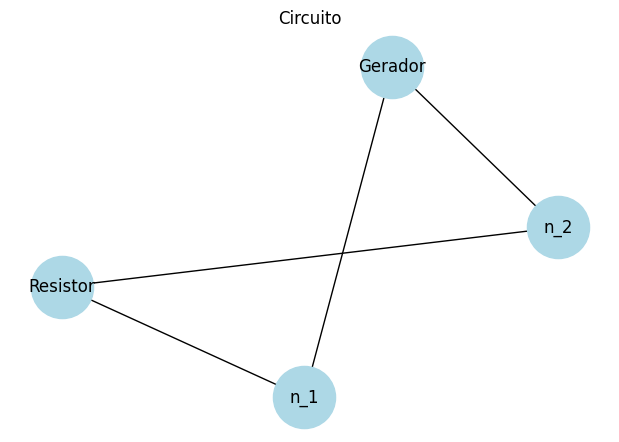

In [81]:
circuito_1 & lampada

circuito_1.dicio

circuito_1

penultimo non_1


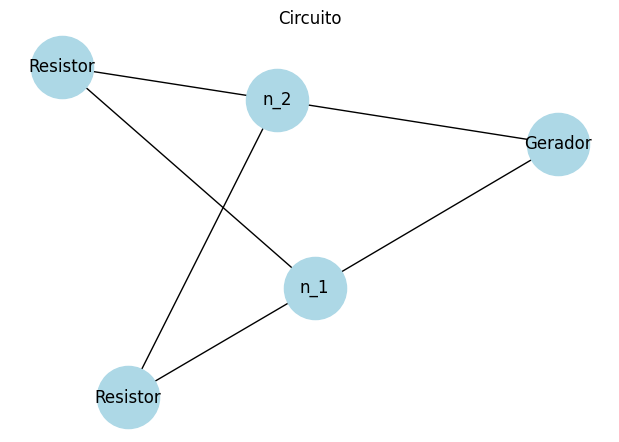

In [82]:
circuito_1 | lampada_vermelha

circuito_1.dicio

circuito_1



In [83]:
circuito_2 = Circuito(tomada)
circuito_2 & lampada_vermelha

print(type(circuito_1))
print(type(circuito_2))


circuito_1 @ circuito_2

<class '__main__.Circuito'>
<class '__main__.Circuito'>


{'Circuito 1': {'ddp': 220,
  'resistência total': 1.0666666666666667,
  'corrente': 206.25},
 'Circuito 2': {'ddp': 220,
  'resistência total': 31,
  'corrente': 7.096774193548387}}

# Conclusão

Esse monstrinho foi muito importante para conhecer novos métodos dunder e usar a criatividade para atribuir novos significados e ações a eles. Como pensamentos futuros fica como ideia criar os métosd __ __rand__ __ e __ __ror__ __. 

-----------

# Referências

https://www.pythonmorsels.com/every-dunder-method/

https://chatgpt.com/share/67e85462-eea0-800c-aab0-04e2c1aff95e